In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [4]:
train = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')
era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [5]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [6]:
#カテゴリ変数の欠損値をmissingで埋める
train[cat_cols] = train[cat_cols].fillna('missing')
test[cat_cols] = test[cat_cols].fillna('missing')

0:	learn: 0.4930948	test: 0.4937219	best: 0.4937219 (0)	total: 108ms	remaining: 18m 1s
1:	learn: 0.3857136	test: 0.3890418	best: 0.3890418 (1)	total: 172ms	remaining: 14m 18s
2:	learn: 0.3230022	test: 0.3303024	best: 0.3303024 (2)	total: 238ms	remaining: 13m 13s
3:	learn: 0.2762034	test: 0.2876318	best: 0.2876318 (3)	total: 296ms	remaining: 12m 20s
4:	learn: 0.2471234	test: 0.2640148	best: 0.2640148 (4)	total: 372ms	remaining: 12m 22s
5:	learn: 0.2386692	test: 0.2557563	best: 0.2557563 (5)	total: 376ms	remaining: 10m 26s
6:	learn: 0.2261983	test: 0.2468057	best: 0.2468057 (6)	total: 454ms	remaining: 10m 47s
7:	learn: 0.2164277	test: 0.2413054	best: 0.2413054 (7)	total: 521ms	remaining: 10m 50s
8:	learn: 0.2069673	test: 0.2369159	best: 0.2369159 (8)	total: 593ms	remaining: 10m 58s
9:	learn: 0.1958580	test: 0.2333808	best: 0.2333808 (9)	total: 667ms	remaining: 11m 6s
10:	learn: 0.1919019	test: 0.2323986	best: 0.2323986 (10)	total: 735ms	remaining: 11m 7s
11:	learn: 0.1869328	test: 0.2319

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 24220 (\N{CJK UNIFIED IDEOGRAPH-5E9C}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 3

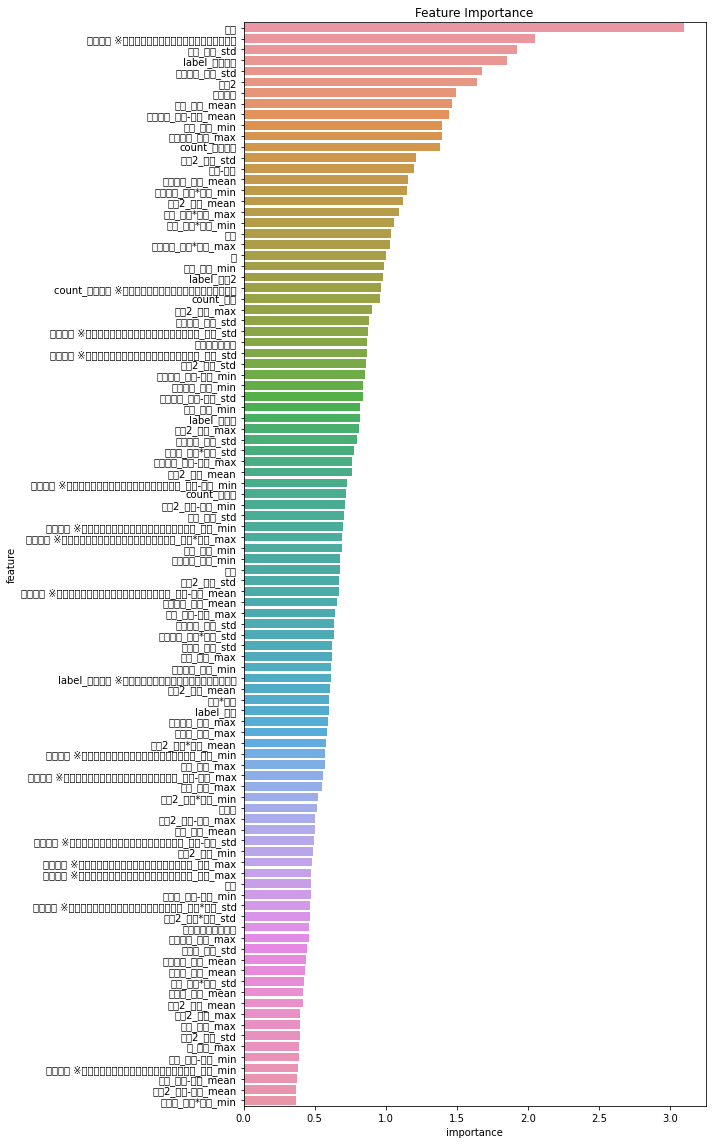

In [7]:
params = {
        "loss_function": 'Logloss', #'MAE', 'Logloss', 'AUC', 'MultiClass','RMSE'
        "learning_rate": 0.2, #0.05
        "iterations": 10000,
        "depth" : 10,
        "early_stopping_rounds":100,
        "random_seed":42531,
        "cat_features": cat_cols,
    }

result = run_experiment(
    params,
    train[num_cols + cat_cols],
    train[target_col],
    test[num_cols + cat_cols],
    cv=StratifiedKFold(5, shuffle=True, random_state=42531), # cv=5,
    #groups = train.book_id,
    #categorical_feature=["user_id","book_id"],→これLGBM用？
    algorithm_type='cat'
)

In [7]:
print(result.metrics) # Evalulation metrics for each fold

[0.8020008051529791, 0.7797584541062802, 0.8265901771336555, 0.7942753623188405, 0.8226916970504463, 0.8044407239635724]


In [6]:
print(result.metrics) # Evalulation metrics for each fold

[0.8064291465378421, 0.7625281803542674, 0.8181199677938809, 0.7984500805152978, 0.8212556146831445, 0.8006157117235975]


In [8]:
result.importance     # Feature importance for each fold

[                       feature  importance
 0                           緯度    0.057469
 1                           経度    0.133018
 2                           開始    0.270051
 3                           終了    0.206715
 4                        緯度*経度    0.201302
 ..                         ...         ...
 244  都道府県 ※美工品は「所有者住所（所在都道府県）」    2.630388
 245                        所在地    0.978965
 246                    保管施設の名称    0.394621
 247                       所有者名    3.587762
 248                  管理団体又は責任者    0.347928
 
 [249 rows x 2 columns],
                        feature  importance
 0                           緯度    0.825493
 1                           経度    0.000000
 2                           開始    3.298723
 3                           終了    0.000000
 4                        緯度*経度    0.000000
 ..                         ...         ...
 244  都道府県 ※美工品は「所有者住所（所在都道府県）」    0.414629
 245                        所在地    0.220363
 246                    保管施設の名称    1.522509
 247 

In [8]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.019767   0.24609495 0.31493725 ... 0.16182627 0.01747907 0.02235964]
[0.01823461 0.10866432 0.17621135 ... 0.04437884 0.32005363 0.01495351]


In [9]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.18181818181818182
Best F1 Score: 0.3542234332425068


In [10]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [11]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [12]:
sample_submission["is_kokuhou"].value_counts()

0    9132
1     933
Name: is_kokuhou, dtype: int64

In [19]:
sample_submission.to_csv('catboost_ver2.csv', index=False)

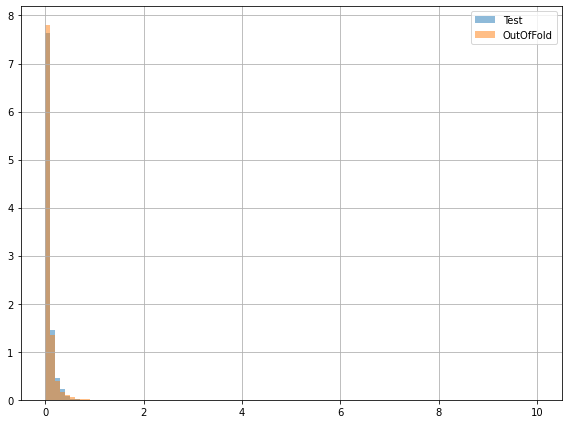

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()

In [14]:
print(result.test_prediction)
print(result.oof_prediction)

[0.019767   0.24609495 0.31493725 ... 0.16182627 0.01747907 0.02235964]
[0.01823461 0.10866432 0.17621135 ... 0.04437884 0.32005363 0.01495351]


In [15]:
df_oof = pd.DataFrame({'cat_ver2_oof':result.oof_prediction})
df_test = pd.DataFrame({'cat_ver2_test' : result.test_prediction})

In [16]:
print(df_oof.shape)
print(df_test.shape)

(6710, 1)
(10065, 1)


In [17]:
df_oof.to_csv('cat_ver2_oof.csv', index=False)
df_test.to_csv('cat_ver2_test.csv', index=False)